https://www.kaggle.com/uciml/breast-cancer-wisconsin-data

Breast Cancer Wisconsin (Diagnostic) Data Set - KAGGLE

도전학기 '빅데이터를 이용한 시스템 강건설계' 수업자료에서 p-value(특징값)추출 그리고 데이터 labeling 부분을 일부 참고했음을 알립니다.

In [3]:
from google.colab import drive
drive.mount('/content/drive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows',   5000)

In [5]:
filename = '/content/drive/My Drive/online_shoppers_intention.csv/datasets_180_408_data.csv'
data = pd.read_csv(filename)
data.head()
print(data.shape)
#data.info()

(569, 33)


Diagnosis - The diagnosis of breast tissues

B - benign

M - malignant (악성)

In [6]:
data_M=data[data['diagnosis']=='M']
data_B=data[data['diagnosis']=='B']
print(data_M.shape,data_B.shape)
data_B.head()

(212, 33) (357, 33)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
19,8510426,B,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.047810,0.1885,0.05766,0.2699,0.7886,2.058,23.560,0.008462,0.014600,0.02387,0.013150,0.01980,0.002300,15.110,19.26,99.70,711.2,0.14400,0.17730,0.23900,0.12880,0.2977,0.07259,NaN
20,8510653,B,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.031100,0.1967,0.06811,0.1852,0.7477,1.383,14.670,0.004097,0.018980,0.01698,0.006490,0.01678,0.002425,14.500,20.49,96.09,630.5,0.13120,0.27760,0.18900,0.07283,0.3184,0.08183,NaN
21,8510824,B,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.020760,0.1815,0.06905,0.2773,0.9768,1.909,15.700,0.009606,0.014320,0.01985,0.014210,0.02027,0.002968,10.230,15.66,65.13,314.9,0.13240,0.11480,0.08867,0.06227,0.2450,0.07773,NaN
37,854941,B,13.030,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.029230,0.1467,0.05863,0.1839,2.3420,1.170,14.160,0.004352,0.004899,0.01343,0.011640,0.02671,0.001777,13.300,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169,NaN
46,85713702,B,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,0.1769,0.06503,0.1563,0.9567,1.094,8.205,0.008968,0.016460,0.01588,0.005917,0.02574,0.002582,8.964,21.96,57.26,242.2,0.12970,0.13570,0.06880,0.02564,0.3105,0.07409,NaN


In [7]:
dataheader=list(data.columns.values)
dataheader

['id',
 'diagnosis',
 'radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean',
 'radius_se',
 'texture_se',
 'perimeter_se',
 'area_se',
 'smoothness_se',
 'compactness_se',
 'concavity_se',
 'concave points_se',
 'symmetry_se',
 'fractal_dimension_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst',
 'symmetry_worst',
 'fractal_dimension_worst',
 'Unnamed: 32']

악성 종양인지, 아닌지 나눈 후 

Label로 쓸 diagnosis, NaN으로 값이 들어있지 않은 Unnamed: 32 그리고 특정 의미를 알아낼 수 없는 id를 column에서 제거

In [8]:
data_B.drop(["diagnosis","Unnamed: 32","id"],axis=1,inplace=True)
data_M.drop(["diagnosis","Unnamed: 32","id"],axis=1,inplace=True)


data_B.head()

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
19,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.047810,0.1885,0.05766,0.2699,0.7886,2.058,23.560,0.008462,0.014600,0.02387,0.013150,0.01980,0.002300,15.110,19.26,99.70,711.2,0.14400,0.17730,0.23900,0.12880,0.2977,0.07259
20,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.031100,0.1967,0.06811,0.1852,0.7477,1.383,14.670,0.004097,0.018980,0.01698,0.006490,0.01678,0.002425,14.500,20.49,96.09,630.5,0.13120,0.27760,0.18900,0.07283,0.3184,0.08183
21,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.020760,0.1815,0.06905,0.2773,0.9768,1.909,15.700,0.009606,0.014320,0.01985,0.014210,0.02027,0.002968,10.230,15.66,65.13,314.9,0.13240,0.11480,0.08867,0.06227,0.2450,0.07773
37,13.030,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.029230,0.1467,0.05863,0.1839,2.3420,1.170,14.160,0.004352,0.004899,0.01343,0.011640,0.02671,0.001777,13.300,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169
46,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,0.1769,0.06503,0.1563,0.9567,1.094,8.205,0.008968,0.016460,0.01588,0.005917,0.02574,0.002582,8.964,21.96,57.26,242.2,0.12970,0.13570,0.06880,0.02564,0.3105,0.07409


In [9]:
dataheader=list(data_B.columns.values)
dataheader


['radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean',
 'radius_se',
 'texture_se',
 'perimeter_se',
 'area_se',
 'smoothness_se',
 'compactness_se',
 'concavity_se',
 'concave points_se',
 'symmetry_se',
 'fractal_dimension_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst',
 'symmetry_worst',
 'fractal_dimension_worst']

In [10]:
Path1 = '/content/drive/My Drive/online_shoppers_intention.csv/data/data_M'
Path2 = '/content/drive/My Drive/online_shoppers_intention.csv/data/data_B'

data_M.to_csv( Path1 , sep=',' , header=None , index=None)
data_B.to_csv(Path2 , sep=',' , header=None , index=None)

In [11]:
test = pd.read_csv('/content/drive/My Drive/online_shoppers_intention.csv/data/data_B', header=None)
test.columns=dataheader
test.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.047810,0.1885,0.05766,0.2699,0.7886,2.058,23.560,0.008462,0.014600,0.02387,0.013150,0.01980,0.002300,15.110,19.26,99.70,711.2,0.14400,0.17730,0.23900,0.12880,0.2977,0.07259
1,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.031100,0.1967,0.06811,0.1852,0.7477,1.383,14.670,0.004097,0.018980,0.01698,0.006490,0.01678,0.002425,14.500,20.49,96.09,630.5,0.13120,0.27760,0.18900,0.07283,0.3184,0.08183
2,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.020760,0.1815,0.06905,0.2773,0.9768,1.909,15.700,0.009606,0.014320,0.01985,0.014210,0.02027,0.002968,10.230,15.66,65.13,314.9,0.13240,0.11480,0.08867,0.06227,0.2450,0.07773
3,13.030,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.029230,0.1467,0.05863,0.1839,2.3420,1.170,14.160,0.004352,0.004899,0.01343,0.011640,0.02671,0.001777,13.300,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169
4,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,0.1769,0.06503,0.1563,0.9567,1.094,8.205,0.008968,0.016460,0.01588,0.005917,0.02574,0.002582,8.964,21.96,57.26,242.2,0.12970,0.13570,0.06880,0.02564,0.3105,0.07409


data_M // data_B

In [12]:
data_M = pd.read_csv('/content/drive/My Drive/online_shoppers_intention.csv/data/data_M', header=None)
data_M.columns=dataheader
data_M.shape

(212, 30)

In [13]:
data_B = pd.read_csv('/content/drive/My Drive/online_shoppers_intention.csv/data/data_B', header=None)
data_B.columns=dataheader
data_M_sample=data_M[:210]
data_B_sample=data_B[:210]
data_B_sample.shape

(210, 30)

In [14]:
data_M_sample=np.transpose(data_M_sample)
data_B_sample=np.transpose(data_B_sample)

In [15]:
data_B_sample

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209
radius_mean,13.540000,13.080000,9.504000,13.030000,8.196000,12.050000,13.490000,11.760000,13.640000,11.940000,11.520000,13.050000,8.618000,10.170000,8.598000,9.173000,9.465000,11.310000,9.029000,12.780000,8.88800,12.310000,13.530000,12.860000,11.450000,13.340000,12.000000,12.360000,14.640000,14.620000,13.270000,13.450000,12.180000,9.787000,11.600000,6.98100,12.180000,9.876000,10.490000,11.64000,12.360000,11.340000,9.777000,12.630000,14.260000,10.510000,8.726000,11.930000,8.950000,11.410000,14.500000,13.370000,13.850000,15.100000,12.190000,15.710000,11.710000,11.430000,11.280000,9.738000,11.430000,12.900000,10.750000,11.900000,14.950000,14.440000,13.740000,13.000000,8.21900,9.73100,11.150000,13.150000,12.250000,16.840000,12.060000,10.900000,11.750000,12.340000,14.970000,10.800000,14.970000,12.320000,11.080000,10.660000,8.671000,9.90400,13.010000,12.810000,11.410000,10.080000,11.710000,11.810000,12.300000,12.770000,9.720000,12.910000,12.230000,12.470000,9.876000,13.110000,15.270000,11.840000,11.890000,10.200000,13.650000,13.560000,10.180000,13.270000,14.340000,10.440000,15.000000,12.620000,11.320000,11.220000,9.567000,14.030000,14.220000,13.640000,12.420000,11.300000,13.750000,10.48000,13.200000,12.890000,10.650000,11.520000,11.500000,10.600000,13.590000,12.870000,10.710000,14.290000,11.290000,9.742000,11.890000,11.330000,13.590000,13.850000,11.740000,12.890000,12.580000,11.940000,12.890000,11.260000,11.370000,14.410000,14.960000,12.950000,11.850000,12.720000,13.770000,10.910000,14.260000,10.510000,12.460000,10.490000,11.460000,11.600000,13.200000,9.000000,13.500000,13.050000,11.700000,14.610000,12.760000,11.540000,8.59700,12.490000,12.180000,9.042000,12.430000,10.250000,12.860000,12.200000,12.670000,14.110000,12.030000,12.980000,11.220000,11.250000,12.300000,12.990000,10.050000,14.420000,9.606000,11.060000,11.710000,10.260000,12.060000,14.760000,11.470000,11.950000,11.660000,11.140000,12.560000,13.050000,13.870000,8.878000,9.436000,12.540000,13.300000,12.760000,16.500000,13.400000,12.210000,15.190000,13.690000,16.170000,10.570000,13.460000
texture_mean,14.360000,15.710000,12.440000,18.420000,16.840000,14.630000,22.300000,21.600000,16.340000,18.240000,18.750000,19.310000,11.790000,14.880000,20.980000,13.860000,21.010000,19.040000,17.330000,16.490000,14.64000,16.520000,10.940000,18.000000,20.970000,15.860000,15.650000,21.800000,15.240000,24.020000,14.760000,18.300000,17.840000,19.940000,12.840000,13.43000,20.520000,19.400000,19.290000,18.33000,18.540000,21.260000,16.990000,20.760000,19.650000,20.190000,15.830000,21.530000,15.760000,10.820000,10.890000,16.390000,17.210000,16.390000,13.290000,13.930000,16.670000,15.390000,13.390000,11.970000,17.310000,15.920000,14.970000,14.650000,18.770000,15.180000,17.910000,20.780000,20.70000,15.34000,13.080000,15.340000,17.940000,19.460000,12.740000,12.960000,20.180000,22.220000,19.760000,9.710000,16.950000,12.390000,14.710000,15.150000,14.450000,18.06000,22.220000,13.060000,14.920000,15.110000,17.190000,17.390000,15.900000,21.410000,18.220000,16.330000,19.560000,18.600000,17.270000,22.540000,12.910000,18.940000,18.350000,17.480000,13.160000,13.900000,17.530000,17.020000,13.470000,15.460000,15.510000,23.970000,27.080000,33.810000,15.910000,21.250000,27.850000,15.600000,15.04000

데이터 특징 추출

In [16]:
import seaborn           as sb
import scipy.stats       as sp

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [17]:
NoOfData    = int(data_M_sample.shape[1])  
NoOfFeature = int(data_M_sample.shape[0])  

P_value = np.zeros((NoOfFeature , 2))

for i in np.arange(NoOfFeature):
    
    T_test       = np.array(sp.ttest_ind(data_B_sample.iloc[i,:] , data_M_sample.iloc[i,:]))
    P_value[i,0] = i         
    P_value[i,1] = T_test[1]  
    
P_value      = pd.DataFrame(P_value)
P_value

,0,1
0,0.0,8.293080e-69
1,1.0,1.510672e-30
2,2.0,2.751477e-72
3,3.0,1.098295e-59
4,4.0,2.804224e-16
5,5.0,9.640470e-43
6,6.0,4.044171e-56
7,7.0,1.755105e-80
8,8.0,3.937660e-11
9,9.0,8.537173e-01


In [46]:
P_value_Rank = P_value.sort_values([1],ascending=True)
Ranking=14
P_value_Rank=P_value_Rank[ :Ranking ]

P_value_Rank

,0,1
27,27.0,2.572613e-95
22,22.0,4.125821e-84
20,20.0,1.946135e-81
7,7.0,1.755105e-80
2,2.0,2.751477e-72
0,0.0,8.293080e-69
23,23.0,1.164101e-64
3,3.0,1.098295e-59
6,6.0,4.044171e-56
26,26.0,3.898542e-53


In [47]:
P_value_Rank.rows=range(Ranking)
P_value_Rank

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


,0,1
27,27.0,2.572613e-95
22,22.0,4.125821e-84
20,20.0,1.946135e-81
7,7.0,1.755105e-80
2,2.0,2.751477e-72
0,0.0,8.293080e-69
23,23.0,1.164101e-64
3,3.0,1.098295e-59
6,6.0,4.044171e-56
26,26.0,3.898542e-53


In [48]:
for x in P_value_Rank[0]:
  print(x)
print()
P_value_Rank[0][22]

27.0
22.0
20.0
7.0
2.0
0.0
23.0
3.0
6.0
26.0
5.0
25.0
21.0
10.0



22.0

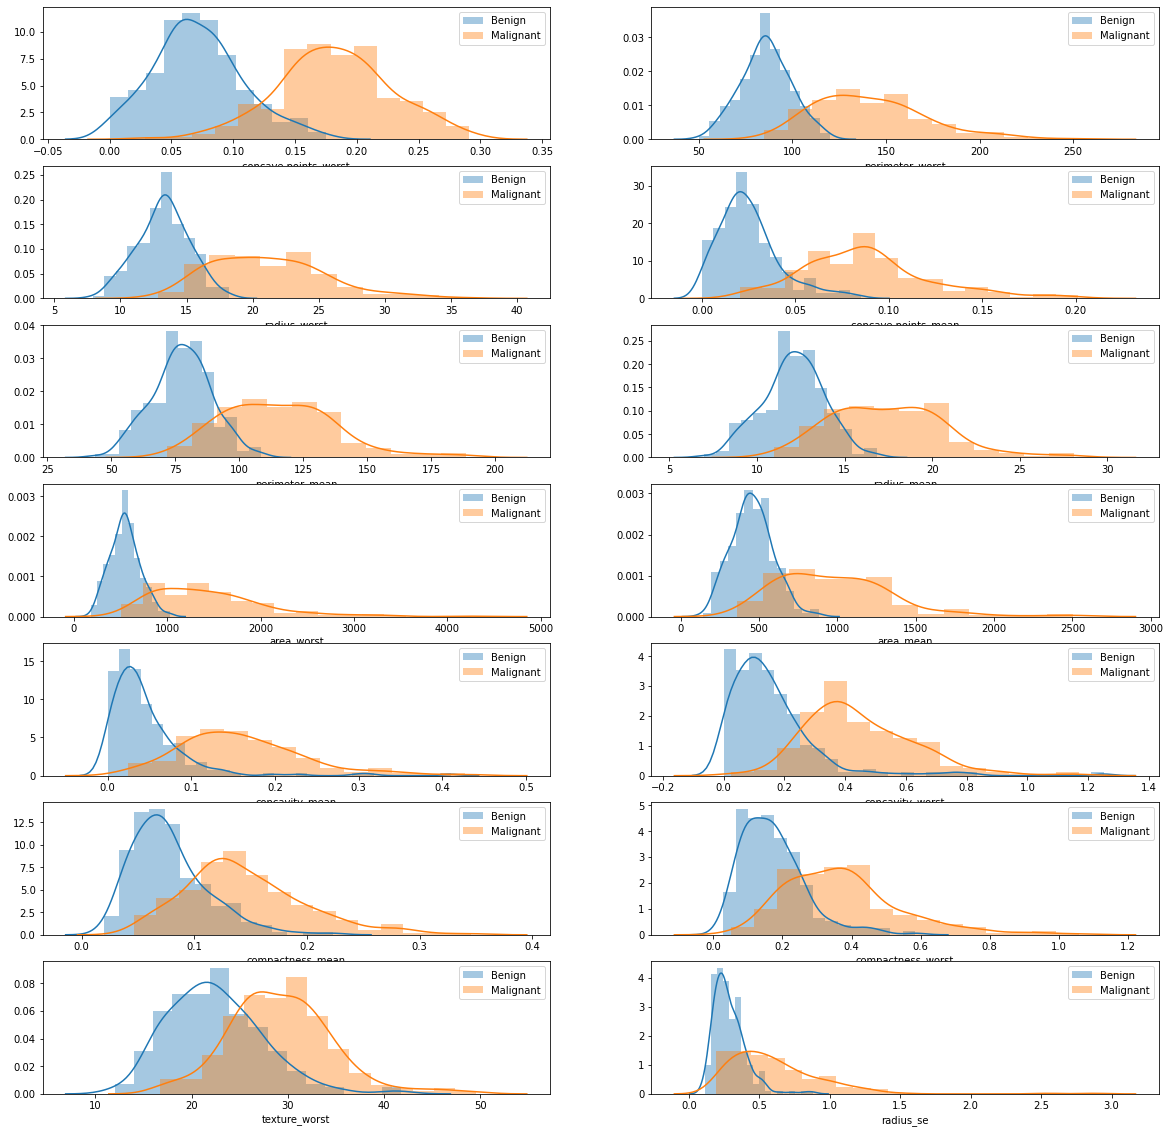

In [49]:
plt.figure(figsize=(20,20))
for x in range(1,Ranking+1):

  FeatureRank = x
  plt.subplot(Ranking/2,2,x)
  sb.distplot(data_B_sample.iloc[int(P_value_Rank.iloc[FeatureRank-1,0])  ,:], label = 'Benign')
  sb.distplot(data_M_sample.iloc[int(P_value_Rank.iloc[FeatureRank-1,0]),:], label = 'Malignant')
  plt.legend(loc='upper right')
plt.show()

In [55]:
Rank = len(P_value_Rank)          
NoOfData=210

FeatureSelected_B = np.zeros((Rank,NoOfData))
FeatureSelected_M = np.zeros((Rank,NoOfData))
count=0
for i in P_value_Rank[0]:
  i=int(i)
  FeatureSelected_B[count,:]=data_B_sample.iloc[i,:].values
  FeatureSelected_M[count,:]=data_M_sample.iloc[i,:].values
  count+=1
FeatureSelected=pd.DataFrame(np.concatenate([FeatureSelected_B,FeatureSelected_M],axis=1))
print(FeatureSelected.shape)
FeatureSelected

(14, 420)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419
0,0.12880,0.07283,0.06227,0.05013,0.025640,0.06548,0.12820,0.03715,0.08586,0.06296,0.06316,0.011110,0.044190,0.02579,0.027780,0.05087,0.06517,0.06961,0.17500,0.05882,0.04786,0.08660,0.07407,0.07926,0.06127,0.17080,0.07632,0.12050,0.13970,0.06946,0.10010,0.07911,0.05882,0.023810,0.08449,0.00000,0.07431,0.09749,0.03203,0.12180,0.08442,0.08278,0.05334,0.11050,0.15050,0.06136,0.10500,0.07247,0.03846,0.08958,0.12210,0.08978,0.05104,0.14230,0.08187,0.13740,0.06968,0.08476,0.08611,0.00000,0.06402,0.10120,0.034130,0.06042,0.08405,0.15990,0.06019,0.06296,0.07879,0.15710,0.05506,0.09722,0.08211,0.08436,0.07025,0.039530,0.07909,0.08194,0.05754,0.04603,0.08485,0.09391,0.04306,0.00000,0.00000,0.09910,0.009259,0.039900,0.06296,0.010420,0.10990,0.04306,0.04815,0.04773,0.00000,0.08235,0.10800,0.10150,0.05588,0.11260,0.10350,0.06913,0.11380,0.03571,0.08056,0.09090,0.05575,0.09678,0.10870,0.044640,0.13790,0.11800,0.020830,0.030020,0.07222,0.07963,0.08219,0.09222,0.04052,0.12180,0.06106,0.06736,0.04970,0.1561,0.06136,0.09608,0.06544,0.07926,0.06189,0.05780,0.08600,0.03333,0.08750,0.05159,0.08946,0.011110,0.05185,0.09993,0.08290,0.1017,0.008772,0.11550,0.05366,0.09314,0.06203,0.10210,0.14890,0.10560,0.09140,0.06343,0.05802,0.03194,0.07530,0.03125,0.07625,0.06528,0.05509,0.04815,0.025000,0.013890,0.022100,0.035320,0.05741,0.05813,0.08411,0.047150,0.00000,0.027840,0.018520,0.11450,0.02832,0.09744,0.11550,0.05556,0.05602,0.05890,0.027960,0.09858,0.020220,0.016670,0.039830,0.05850,0.06499,0.14140,0.08120,0.10750,0.07864,0.04074,0.050930,0.12510,0.06548,0.04766,0.042620,0.03922,0.09265,0.12580,0.05556,0.04762,0.05052,0.016350,0.05614,0.08312,0.09123,0.06987,0.08829,0.08178,0.06987,0.12510,0.14650,0.05781,0.2654,0.18600,0.2430,0.2575,0.1625,0.17410,0.1932,0.15560,0.20600,0.22100,0.09975,0.18100,0.1767,0.11190,0.22080,0.17120,0.16090,0.2073,0.23880,0.23930,0.20090,0.2095,0.2550,0.27010,0.14900,0.20240,0.14560,0.1848,0.15460,0.1847,0.17850,0.18640,0.18130,0.14470,0.02899,0.22580,0.11120,0.14240,0.24930,0.14920,0.16070,0.2378,0.2088,0.1325,0.15300,0.20910,0.18340,0.17850,0.17160,0.16140,0.17890,0.18990,0.13830,0.15200,0.2102,0.2508,0.2867,0.1841,0.16420,0.12250,0.19560,0.14760,0.21150,0.15730,0.15650,0.11840,0.19860,0.2910,0.20270,0.20340,0.11850,0.16740,0.2248,0.13290,0.12180,0.1732,0.15140,0.13120,0.13790,0.09331,0.16670,0.12160,0.18650,0.1515,0.17770,0.2247,0.23460,0.14740,0.1721,0.11600,0.1827,0.20350,0.2688,0.

In [56]:
FeatureSelected_B=pd.DataFrame(FeatureSelected_B)

In [57]:
FeatureSelected_B

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209
0,0.12880,0.07283,0.06227,0.05013,0.025640,0.06548,0.12820,0.03715,0.08586,0.06296,0.06316,0.011110,0.044190,0.02579,0.027780,0.05087,0.06517,0.06961,0.17500,0.05882,0.04786,0.08660,0.07407,0.07926,0.06127,0.17080,0.07632,0.12050,0.13970,0.06946,0.10010,0.07911,0.05882,0.023810,0.08449,0.00000,0.07431,0.09749,0.03203,0.12180,0.08442,0.08278,0.05334,0.11050,0.15050,0.06136,0.10500,0.07247,0.03846,0.08958,0.12210,0.08978,0.05104,0.14230,0.08187,0.13740,0.06968,0.08476,0.08611,0.00000,0.06402,0.10120,0.034130,0.06042,0.08405,0.15990,0.06019,0.06296,0.07879,0.15710,0.05506,0.09722,0.08211,0.08436,0.07025,0.039530,0.07909,0.08194,0.05754,0.04603,0.08485,0.09391,0.04306,0.00000,0.00000,0.09910,0.009259,0.039900,0.06296,0.010420,0.10990,0.04306,0.04815,0.04773,0.00000,0.08235,0.10800,0.10150,0.05588,0.11260,0.10350,0.06913,0.11380,0.03571,0.08056,0.09090,0.05575,0.09678,0.10870,0.044640,0.13790,0.11800,0.020830,0.030020,0.07222,0.07963,0.08219,0.09222,0.04052,0.12180,0.06106,0.06736,0.04970,0.1561,0.06136,0.09608,0.06544,0.07926,0.06189,0.05780,0.08600,0.03333,0.08750,0.05159,0.08946,0.011110,0.05185,0.09993,0.08290,0.1017,0.008772,0.11550,0.05366,0.09314,0.06203,0.10210,0.14890,0.10560,0.09140,0.06343,0.05802,0.03194,0.07530,0.03125,0.07625,0.06528,0.05509,0.04815,0.025000,0.013890,0.022100,0.035320,0.05741,0.05813,0.08411,0.047150,0.00000,0.027840,0.018520,0.11450,0.02832,0.09744,0.11550,0.05556,0.05602,0.05890,0.027960,0.09858,0.020220,0.016670,0.039830,0.05850,0.06499,0.14140,0.08120,0.10750,0.07864,0.04074,0.050930,0.12510,0.06548,0.04766,0.042620,0.03922,0.09265,0.12580,0.05556,0.04762,0.05052,0.016350,0.05614,0.08312,0.09123,0.06987,0.08829,0.08178,0.06987,0.12510,0.14650,0.05781
1,99.70000,96.09000,65.13000,84.46000,57.260000,89.88000,99.00000,82.98000,96.08000,83.67000,81.81000,90.240000,59.900000,69.86000,62.060000,65.59000,67.03000,78.00000,65.50000,85.67000,62.56000,89.71000,91.36000,91.88000,84.53000,96.66000,87.78000,91.46000,109.40000,102.90000,104.50000,97.59000,82.14000,68.810000,82.96000,50.41000,84.58000,72.22000,74.22000,85.51000,85.56000,83.99000,71.68000,89.00000,107.00000,72.62000,64.48000,87.54000,63.34000,83.74000,102.80000,91.99000,100.30000,105.90000,91.38000,114.30000,86.16000,79.93000,76.53000,66.53000,82.66000,97.17000,77.790000,86.26000,107.10000,108.60000,97.19000,90.82000,58.08000,71.04000,76.25000,97.67000,86.60000,120.30000,84.08000,78.070000,88.91000,87.36000,102.30000,73.66000,104.60000,86.97000,72.01000,73.20000,58.36000,73.07000,88.180000,86.700000,79.12000,75.390000,84.42000,79.57000,86.65000,89.04000,62.25000,90.81000,92.15000,96.05000,67.08000,99.48000,113.70000,85.22000,86.20000,75.40000,99.71000,101.10000,71.94000,98.84000,110.40000,73.470000,114.20000,90.67000,79.820000,78.440000,65.74000,98.27000,102.50000,94.11000,83.85000,87.16000,98.00000,73.68000,88.28000,105.0000,77.98000,80.88000,83.12000,78.28000,97.66000,89.27000,76.51000,94.44000,78.27000,68.09000,79.46000,77.370000,98.91000,98.37000,84.70000,92.1200,85.560000,92.20000,87.40000,78.27000,79.29000,101.70000,109.10000,88.81000,84.35000,88.54000,94.17000,72.42000,105.80000,70.10000,88.13000,70.76000,82.69000,81.39000,92.000000,60.900000,95.480000,93.960000,80.92000,103.70000,92.04000,81.230000,56.65000,84.480000,81.6

In [58]:
Path = '/content/drive/My Drive/online_shoppers_intention.csv/data/FeatureSelected'

FeatureSelected.to_csv( Path , sep=',' , header=None , index=None)

Path = '/content/drive/My Drive/online_shoppers_intention.csv/data/P_value_Rank'

P_value_Rank.to_csv( Path , sep=',' , header=None , index=None)

In [59]:
test = pd.read_csv('/content/drive/My Drive/online_shoppers_intention.csv/data/P_value_Rank', header=None)

test.shape


(14, 2)